In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import data, img_as_float
from skimage import exposure
from scipy.ndimage import median_filter
from scipy.ndimage import binary_erosion, binary_dilation

In [2]:
image = cv2.imread("termo.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [3]:
image.shape

(816, 1224, 3)

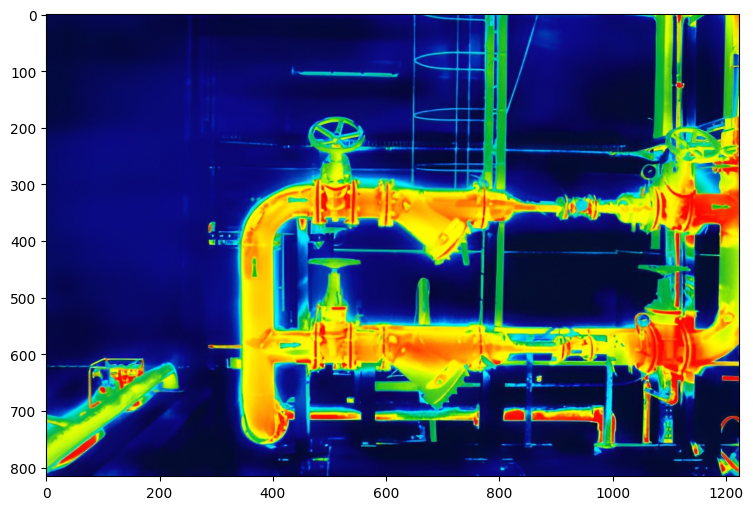

In [9]:
plt.figure(figsize=(12, 6))
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(image)

# Filtros espaciales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


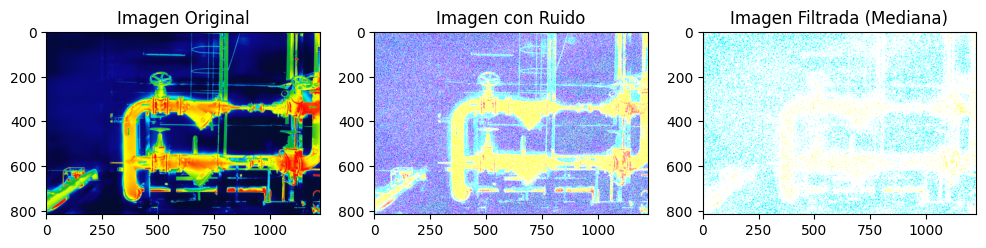

In [10]:
# Agregar ruido a la imagen para ilustrar la efectividad del filtro de mediana
noisy_image = image + 30 * np.random.randn(*image.shape)

# Aplicar el filtro de mediana
filtered_image = median_filter(noisy_image, size=3)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image,)# cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Imagen con Ruido')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen Filtrada (Mediana)')

plt.show()

In [11]:
def apply_gaussian_and_histogram_equalization(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    kernel_size = (5, 5)
    sigma = 0
    blurred_image = cv2.GaussianBlur(gray_image, kernel_size, sigma)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(blurred_image)

    # Calculate histogram of the original image
    histogram_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    histogram_blurred = cv2.calcHist([blurred_image], [0], None, [256], [0, 256])
    histogram_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])


    # Display the images and histogram
    plt.figure(figsize=(18, 9))

    plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(232), plt.imshow(blurred_image, cmap='gray'), plt.title('Blurred Image')
    plt.subplot(233), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')

    # plt.subplot(234), plt.plot(histogram_original), plt.title('Histogram of Original Image')
    # plt.subplot(235), plt.plot(histogram_blurred), plt.title('Histogram of Blurred Image')
    # plt.subplot(236), plt.plot(histogram_equalized), plt.title('Histogram of equalized_image Image')


    plt.show()


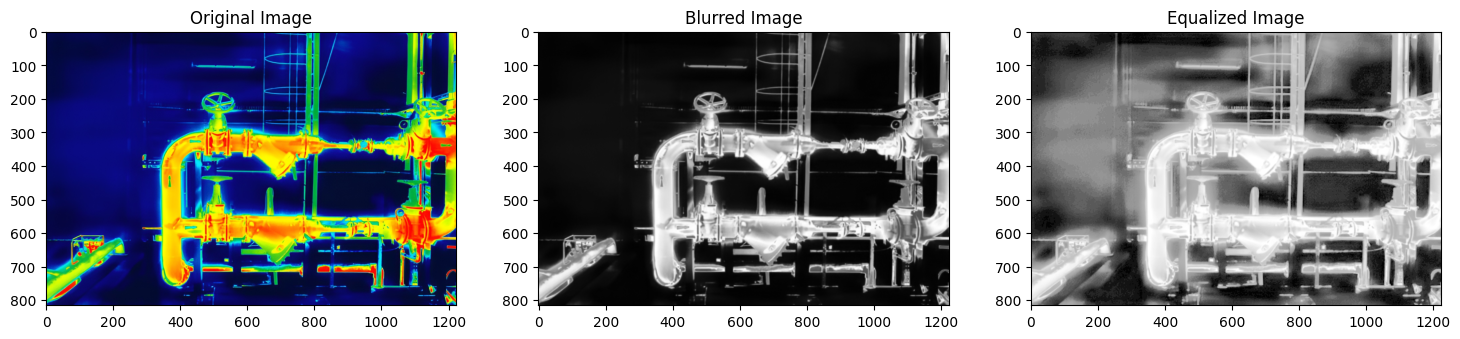

In [12]:
apply_gaussian_and_histogram_equalization("termo.jpg") 

# Transformaciones morfológicas

In [14]:

def hit_or_miss(image, se_positive, se_negative):
    # Aplicar la transformación de Hit-or-Miss a cada canal de color por separado
    result = np.zeros_like(image, dtype=np.bool)
    for channel in range(image.shape[-1]):
        erosion_positive = np.logical_and(image[..., channel], binary_erosion(image[..., channel], se_positive))
        erosion_negative = np.logical_and(~image[..., channel], binary_erosion(~image[..., channel], se_negative))
        result[..., channel] = np.logical_and(erosion_positive, erosion_negative)
    return result

# Crear una imagen de ejemplo (puedes reemplazarla con tu propia imagen)
# image = color.rgb2gray(data.astronaut()) > 0.5  # Convertir a escala de grises y binarizar

# Definir un elemento estructurante para la transformación de Hit-or-Miss
se_positive = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]])

se_negative = np.array([[1, 0, 1],
                       [0, 0, 0],
                       [1, 0, 1]])

# Aplicar la transformación de Hit-or-Miss
result = hit_or_miss(image, se_positive, se_negative)

# Mostrar las imágenes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(result, cmap='gray')
plt.title('Transformación de Hit-or-Miss')

plt.show()

/tmp/ipykernel_9023/750272410.py:3: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  result = np.zeros_like(image, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations